In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def log_2_formatter(x, pos):
    return '$2^{{{}}}$'.format(int(x))

def log_10_formatter(x, pos):
    return '$10^{{{}}}$'.format(int(x))

## Real-world Applications

In [3]:
times_slashdot = {
    "EdgeExist": {"privGraph": 11525.5/1024, "edgelist": 346.651}, 
    "NeighborsCount": {"privGraph": 1445.42/32, "edgelist": 407.936},
    "NeighborsGet": {"privGraph": 4047.39/32, "edgelist": 674.55},
    "CycleIdentify": {"privGraph": 73.59, "edgelist": 1945.89},
    "2hopNeighbors": {"privGraph": 1039.9, "edgelist": 5843.86},
    "Statistic": {"privGraph": 83.358, "edgelist": 638.818}, 
}

times_dblp = {
    "EdgeExist": {"privGraph": 32460/1024, "edgelist": 192.302}, 
    "NeighborsCount": {"privGraph": 4341.3/32, "edgelist": 236.572},
    "NeighborsGet": {"privGraph": 1965.22/32, "edgelist": 319.77},
    "CycleIdentify": {"privGraph": 213.38, "edgelist": 1006.48},
    "2hopNeighbors": {"privGraph": 960.269, "edgelist": 2159.76},
    "Statistic": {"privGraph": 106.959, "edgelist": 375.59}, 
}

times_twitter = {
    "EdgeExist": {"privGraph": 359.058, "edgelist": 795550}, 
    "NeighborsCount": {"privGraph": 19457.8, "edgelist": 906564},
    "NeighborsGet": {"privGraph": 89211.6, "edgelist": 1.77331e+06},
    "CycleIdentify": {"privGraph": 1873.44, "edgelist": 4.7352e+06},
    "2hopNeighbors": {"privGraph": 484975, "edgelist": 1.11665e+07},
    "Statistic": {"privGraph": 29411.9, "edgelist": 1.25181e+06}, 
}

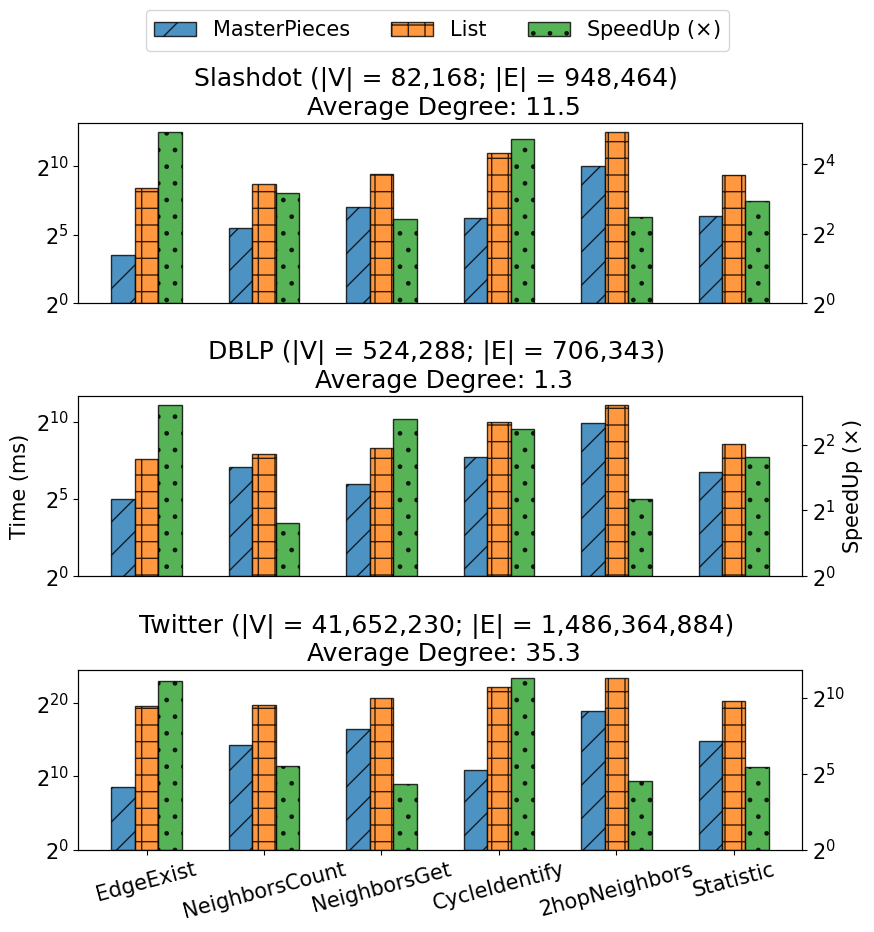

In [6]:
from matplotlib.ticker import FuncFormatter

title_dict = {
    "slashdot": "Slashdot (|V| = 82,168; |E| = 948,464) \n Average Degree: 11.5",
    "dblp": "DBLP (|V| = 524,288; |E| = 706,343) \n Average Degree: 1.3",
    "twitter": "Twitter (|V| = 41,652,230; |E| = 1,486,364,884) \n Average Degree: 35.3"
}

plt.rcParams['font.size'] = 15
fig, axs = plt.subplots(3, 1, figsize=(9, 9))

target_dicts = ["slashdot", "dblp", "twitter"]
hatch_list = ["/", "+", "."]
color_list = plt.cm.tab10([0, 1, 2])

# for target in target_dicts:
for i in range(len(target_dicts)):
    target = target_dicts[i]
    ax = axs[i]
    ax2 = ax.twinx()
    t_dict = eval("times_" + target)

    operations = list(t_dict.keys())
    privGraph_times = np.array([t_dict[op]["privGraph"] for op in t_dict])
    edgelist_times = np.array([t_dict[op]["edgelist"] for op in t_dict])

    x = np.arange(len(operations))
    width = 0.2

    if(i == 0):
        ax.bar(x - width, np.log2(privGraph_times), width, label='MasterPieces', edgecolor='black', hatch=hatch_list[0], color=color_list[0], alpha=0.8)
        ax.bar(x, np.log2(edgelist_times), width, label='List', edgecolor='black', hatch=hatch_list[1], color=color_list[1], alpha=0.8)
        ax2.bar(x + width, np.log2(edgelist_times / privGraph_times), width, label='SpeedUp ($\\times$)', edgecolor='black', hatch=hatch_list[2], color=color_list[2], alpha=0.8)
    else:
        ax.bar(x - width, np.log2(privGraph_times), width, edgecolor='black', hatch=hatch_list[0], color=color_list[0], alpha=0.8)
        ax.bar(x, np.log2(edgelist_times), width, edgecolor='black', hatch=hatch_list[1], color=color_list[1], alpha=0.8)
        ax2.bar(x + width, np.log2(edgelist_times / privGraph_times), width, edgecolor='black', hatch=hatch_list[2], color=color_list[2], alpha=0.8)
    
    if(i == 1):
        ax.set_ylabel('Time (ms)', fontsize=15)
        ax2.set_ylabel('SpeedUp ($\\times$)', fontsize=15)
    
    log2formatter = FuncFormatter(log_2_formatter)
    ax.set_title(title_dict[target])
    ax.yaxis.set_major_formatter(log2formatter)
    ax2.yaxis.set_major_formatter(log2formatter)
    
    # ax.set_xticks(rotation=45)
    if(i == 2):
        ax.set_xticks(x)
        ax.set_xticklabels(operations, rotation=15)
    else:
        ax.set_xticks([])

    
# plt.legend()
fig.legend(bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=3)
plt.tight_layout()
# plt.show()

plt.savefig("./graph/real_world.pdf", bbox_inches='tight', dpi=300)
    

In [6]:
# for target in target_dicts:
query_dict = {op: [] for op in times_slashdot}
time_dict_privGraph = {op: [] for op in times_slashdot}
time_dict_edgelist = {op: [] for op in times_slashdot}

for i in range(len(target_dicts)):
    target = target_dicts[i]
    t_dict = eval("times_" + target)
    
    privGraph_times = np.array([t_dict[op]["privGraph"] for op in t_dict])
    edgelist_times = np.array([t_dict[op]["edgelist"] for op in t_dict])
    speedup = edgelist_times / privGraph_times
    
    for op in t_dict:
        print(target, op, t_dict[op]["privGraph"])
        query_dict[op].append(t_dict[op]["edgelist"] / t_dict[op]["privGraph"])
        time_dict_privGraph[op].append(t_dict[op]["privGraph"])
        time_dict_edgelist[op].append(t_dict[op]["edgelist"])
        
    argmax = np.argmax(privGraph_times)
    print(target, list(t_dict.keys())[argmax], privGraph_times[argmax])
    argmin = np.argmin(privGraph_times)
    print(target, list(t_dict.keys())[argmin], privGraph_times[argmin])

slashdot EdgeExist 11.25537109375
slashdot NeighborsCount 45.169375
slashdot NeighborsGet 126.4809375
slashdot CycleIdentify 73.59
slashdot 2hopNeighbors 1039.9
slashdot Statistic 83.358
slashdot 2hopNeighbors 1039.9
slashdot EdgeExist 11.25537109375
dblp EdgeExist 31.69921875
dblp NeighborsCount 135.665625
dblp NeighborsGet 61.413125
dblp CycleIdentify 213.38
dblp 2hopNeighbors 960.269
dblp Statistic 106.959
dblp 2hopNeighbors 960.269
dblp EdgeExist 31.69921875
twitter EdgeExist 359.058
twitter NeighborsCount 19457.8
twitter NeighborsGet 89211.6
twitter CycleIdentify 1873.44
twitter 2hopNeighbors 484975
twitter Statistic 29411.9
twitter 2hopNeighbors 484975.0
twitter EdgeExist 359.058


In [7]:
query_dict

{'EdgeExist': [30.798717973189884, 6.066458656808379, 2215.658751510898],
 'NeighborsCount': [9.031251816081138, 1.7437873448045516, 46.59128986833044],
 'NeighborsGet': [5.33321473838696, 5.206867424512268, 19.87757197494496],
 'CycleIdentify': [26.44231553200163, 4.716843190552067, 2527.542915705867],
 '2hopNeighbors': [5.619636503509952, 2.249119777895569, 23.024898190628384],
 'Statistic': [7.663547589913385, 3.5115324563617833, 42.5613442178166]}

In [8]:
basic_queries = ["EdgeExist", "NeighborsCount", "NeighborsGet"]
basic_query_speedups = np.array([query_dict[op] for op in basic_queries])
basic_query_time_privGraph = np.array([time_dict_privGraph[op] for op in basic_queries])
basic_query_time_edgelist = np.array([time_dict_edgelist[op] for op in basic_queries])

complex_queries = ["CycleIdentify", "2hopNeighbors", "Statistic"]
complex_query_speedups = np.array([query_dict[op] for op in complex_queries])
complex_query_time_privGraph = np.array([time_dict_privGraph[op] for op in complex_queries])
complex_query_time_edgelist = np.array([time_dict_edgelist[op] for op in complex_queries])

In [9]:
basic_query_speedups.mean()

260.03421236755077

In [10]:
basic_query_speedups.max()

2215.658751510898

In [11]:
complex_query_speedups.max()

2527.542915705867

In [12]:
complex_query_speedups.mean()

293.70357257383847

In [13]:
complex_query_time_privGraph.max()

484975.0

In [14]:
complex_query_time_privGraph.mean()

57637.53288888888

In [15]:
complex_query_time_privGraph.min()

73.59

In [16]:
((1.11665e+07 / 1000) / 60) / 60

3.1018055555555555

## Parallelization and Scalability

In [17]:
times_twitter_parallel = {
    "EdgeExist": {"privGraph": [359.058, 210.613, 124.793, 85.31, 58.144], "edgelist": [795550, 376407, 177360, 88427, 49790.8]}, 
    "CycleIdentify": {"privGraph": [1873.44, 1062.38, 545.02, 373.513, 215.637], "edgelist": [4.7352e+06, 2.30051e+06, 1.09369e+06, 516636, 311727]},
    "NeighborsCount": {"privGraph": [19457.8, 14312.5, 7637.87, 4053.82, 2974.59], "edgelist": [906564, 439345, 204260, 104929, 67169.5]},
    "Statistic": {"privGraph": [29411.9, 18216.4, 10389.9, 5296.15, 3810.67], "edgelist": [1.25181e+06, 573396, 287015, 139825, 79175.1]}, 
    "NeighborsGet": {"privGraph": [89211.6, 59913.2, 44230.7, 36772.6, 35651.6], "edgelist": [1.77331e+06, 1.40266e+06, 1.03709e+06, 868674, 791752]},
    "2hopNeighbors": {"privGraph": [484975, 347226, 262480, 224321, 216838], "edgelist": [1.11665e+07, 8.32523e+06, 6.48938e+06, 5.70601e+06, 5.44008e+06]},
}

target_parallels = [1, 2, 4, 8, 16]



max speedup =  EdgeExist 6.175323335167859 15.97785132996457
max speedup =  CycleIdentify 8.687933888896618 15.190214514623372
max speedup =  NeighborsCount 6.541338470175721 13.496661431155509
max speedup =  Statistic 7.718301506034372 15.810652591534458
max speedup =  NeighborsGet 2.5023168665641937 2.2397291070941407
max speedup =  2hopNeighbors 2.236577537147548 2.052635255363892


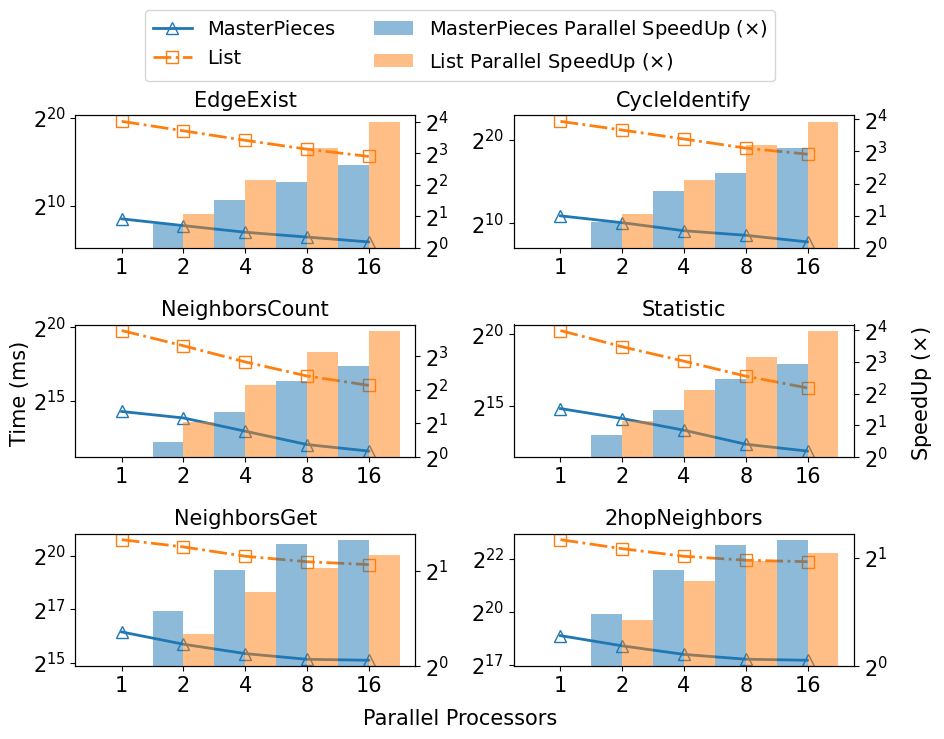

In [18]:
import matplotlib.ticker as ticker

plt.rcParams['font.size'] = 15
fig, axs = plt.subplots(3, 2, figsize=(9, 6.5))
plt.subplots_adjust(wspace=0.2, hspace=0.2)


cmap = plt.get_cmap("tab10")


for i in range(len(times_twitter_parallel)):
    target_query = times_twitter_parallel[list(times_twitter_parallel.keys())[i]]

    j, k = i // 2, i % 2
    ax = axs[j][k]
    ax2 = ax.twinx()
    ours_time = target_query["privGraph"]
    elist_time = target_query["edgelist"]
    speed_up_ours = np.array(ours_time[0]) / np.array(ours_time)
    speed_up_elist = np.array(elist_time[0]) / np.array(elist_time)
    
    if(i == 0):    
        # ax.plot(np.log2(target_parallels), np.log2(ours_time), marker='^', label='MasterPieces', color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8)
        # ax.plot(np.log2(target_parallels), np.log2(elist_time), marker='s', label='List', color=cmap(1), linestyle='-.', markerfacecolor='none', markersize=8)
        ax2.bar(np.log2(target_parallels)-0.25, np.log2(speed_up_ours), width=0.5, label='MasterPieces Parallel SpeedUp ($\\times$)', color=cmap(0), alpha=0.5)
        ax2.bar(np.log2(target_parallels)+0.25, np.log2(speed_up_elist), width=0.5,  label='List Parallel SpeedUp ($\\times$)', color=cmap(1), alpha=0.5)
        ax.plot(np.log2(target_parallels), np.log2(ours_time), marker='^', label='MasterPieces', color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8, linewidth=2)
        ax.plot(np.log2(target_parallels), np.log2(elist_time), marker='s', label='List', color=cmap(1), linestyle='-.', markerfacecolor='none', markersize=8, linewidth=2)
    else:
        # ax.plot(np.log2(target_parallels), np.log2(ours_time), marker='^', color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8)
        # ax.plot(np.log2(target_parallels), np.log2(elist_time), marker='s', color=cmap(1), linestyle='-.', markerfacecolor='none', markersize=8)
        ax2.bar(np.log2(target_parallels)-0.25, np.log2(speed_up_ours), width=0.5,  color=cmap(0), alpha=0.5)
        ax2.bar(np.log2(target_parallels)+0.25, np.log2(speed_up_elist), width=0.5,  color=cmap(1), alpha=0.5)
        ax.plot(np.log2(target_parallels), np.log2(ours_time), marker='^', color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8, linewidth=2)
        ax.plot(np.log2(target_parallels), np.log2(elist_time), marker='s', color=cmap(1), linestyle='-.', markerfacecolor='none', markersize=8, linewidth=2)
    
    print("max speedup = ", list(times_twitter_parallel.keys())[i], np.max(speed_up_ours), np.max(speed_up_elist))
    ax.set_title(list(times_twitter_parallel.keys())[i], fontsize=15)
    
    log2formatter = FuncFormatter(log_2_formatter)
    ax.yaxis.set_major_formatter(log2formatter)
    ax2.yaxis.set_major_formatter(log2formatter)
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
    # ax.xaxis.set_major_formatter(log_2_formatter)
    ax.set_xticks(np.log2(target_parallels))
    ax.set_xticklabels([1, 2, 4, 8, 16], rotation=0)
    
    # if(k == 2):
        # ax.set_xlabel('Parallel Processes', fontsize=13)



plt.tight_layout()  
fig.text(0, 0.5, 'Time (ms)', va='center', rotation='vertical', fontsize=15)
fig.text(1, 0.5, 'SpeedUp ($\\times$)', va='center', rotation='vertical', fontsize=15)
fig.text(0.5, -0.01, 'Parallel Processors', ha='center', fontsize=15)

fig.legend(bbox_to_anchor=(0.5, 1.105), loc='upper center', ncol=2, fontsize=14)
plt.savefig("./graph/real_world_parallel.pdf", bbox_inches='tight', dpi=300)
    
    

In [19]:
speedups_dict = {op: np.array(times_twitter_parallel[op]["edgelist"]) / np.array(times_twitter_parallel[op]["privGraph"]) for op in times_twitter_parallel}

In [20]:
speedups_mat = np.array([speedups_dict[op] for op in speedups_dict])
speedups_mat.mean()

579.3859417324198

## Offline construction

In [26]:
time_construction_parallel = {
    "VORAM": [1.63385e+06, 829676, 422090, 243837, 174092],
    "EORAM": [1.31137e+06, 678437, 353513, 211524, 153643],
}

target_parallels = [1, 2, 4, 8, 16]

VORAM Speedups =  [1.         1.9692627  3.87085693 6.70058277 9.38498036]
EORAM Speedups =  [1.         1.93292819 3.70953826 6.19962747 8.5351757 ]


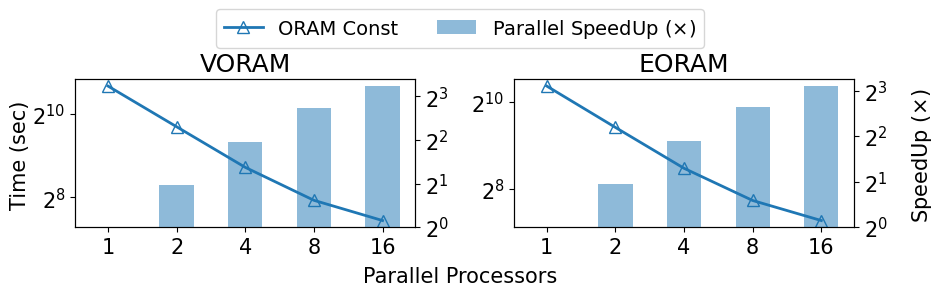

In [28]:
import matplotlib.ticker as ticker

plt.rcParams['font.size'] = 15
fig, axs = plt.subplots(1, 2, figsize=(9, 2.5))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax = axs[0]
ax2 = ax.twinx()
target_query = np.array(time_construction_parallel["VORAM"]) / 1000
speedups = np.array(target_query[0]) / np.array(target_query)
print("VORAM Speedups = ", speedups)
ax2.bar(np.log2(target_parallels), np.log2(speedups), width=0.5, label='Parallel SpeedUp ($\\times$)', color=cmap(0), alpha=0.5)
ax.plot(np.log2(target_parallels), np.log2(target_query), marker='^', label='ORAM Const', color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8, linewidth=2)
# ax.bar([], [], label='Parallel SpeedUp ($\\times$)')

log2formatter = FuncFormatter(log_2_formatter)
ax.yaxis.set_major_formatter(log2formatter)
ax2.yaxis.set_major_formatter(log2formatter)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.xaxis.set_major_formatter(log_2_formatter)
ax.set_xticks(np.log2(target_parallels))
ax.set_xticklabels([1, 2, 4, 8, 16], rotation=0)
ax.set_title("VORAM")
# ax.legend()
# ax2.legend()

ax = axs[1]
ax2 = ax.twinx()
target_query = np.array(time_construction_parallel["EORAM"]) / 1000
speedups = np.array(target_query[0]) / np.array(target_query)
print("EORAM Speedups = ", speedups)
ax2.bar(np.log2(target_parallels), np.log2(speedups), width=0.5,  color=cmap(0), alpha=0.5)
ax.plot(np.log2(target_parallels), np.log2(target_query), marker='^',  color=cmap(0), linestyle='-', markerfacecolor='none', markersize=8, linewidth=2)

log2formatter = FuncFormatter(log_2_formatter)
ax.yaxis.set_major_formatter(log2formatter)
ax2.yaxis.set_major_formatter(log2formatter)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.xaxis.set_major_formatter(log_2_formatter)
ax.set_xticks(np.log2(target_parallels))
ax.set_xticklabels([1, 2, 4, 8, 16], rotation=0)
ax.set_title("EORAM")
# ax.legend()
# ax2.legend()

plt.tight_layout()
fig.text(0, 0.5, 'Time (sec)', va='center', rotation='vertical', fontsize=15)
fig.text(1, 0.5, 'SpeedUp ($\\times$)', va='center', rotation='vertical', fontsize=15)
fig.text(0.5, -0.01, 'Parallel Processors', ha='center', fontsize=15)
# fig.legend()
fig.legend(bbox_to_anchor=(0.5, 1.12), loc='upper center', ncol=2, fontsize=14)
plt.savefig("./graph/real_world_parallel_offline.pdf", bbox_inches='tight', dpi=300)



## Communications

In [7]:
comm_slashdot = {
    "EdgeExist": {"privGraph": 1.18339, "edgelist": 45.5642}, 
    "NeighborsCount": {"privGraph": 17.154, "edgelist": 67.5789},
    "NeighborsGet": {"privGraph": 24.9108, "edgelist": 120.692},
    "CycleIdentify": {"privGraph": 7.10035, "edgelist": 273.385},
    "2hopNeighbors": {"privGraph": 203.984, "edgelist": 988.301},
    "Statistic": {"privGraph": 21.9263, "edgelist": 90.6985}, 
}

comm_dblp = {
    "EdgeExist": {"privGraph": 8.56864, "edgelist": 34.0333}, 
    "NeighborsCount": {"privGraph": 31.1645, "edgelist": 50.3279},
    "NeighborsGet": {"privGraph": 45.2573, "edgelist": 89.8824},
    "CycleIdentify": {"privGraph": 51.4118, "edgelist": 204.2},
    "2hopNeighbors": {"privGraph": 234.822, "edgelist": 466.364},
    "Statistic": {"privGraph": 39.8342, "edgelist": 67.5458}, 
}

comm_twitter = {
    "EdgeExist": {"privGraph": 52.2794, "edgelist": 70484.6}, 
    "NeighborsCount": {"privGraph": 6026.63, "edgelist": 104621},
    "NeighborsGet": {"privGraph": 8751.93, "edgelist": 251274},
    "CycleIdentify": {"privGraph": 313.676, "edgelist": 422907},
    "2hopNeighbors": {"privGraph": 54162.2, "edgelist": 1.15634e+06},
    "Statistic": {"privGraph": 7703.08, "edgelist": 140412}, 
}

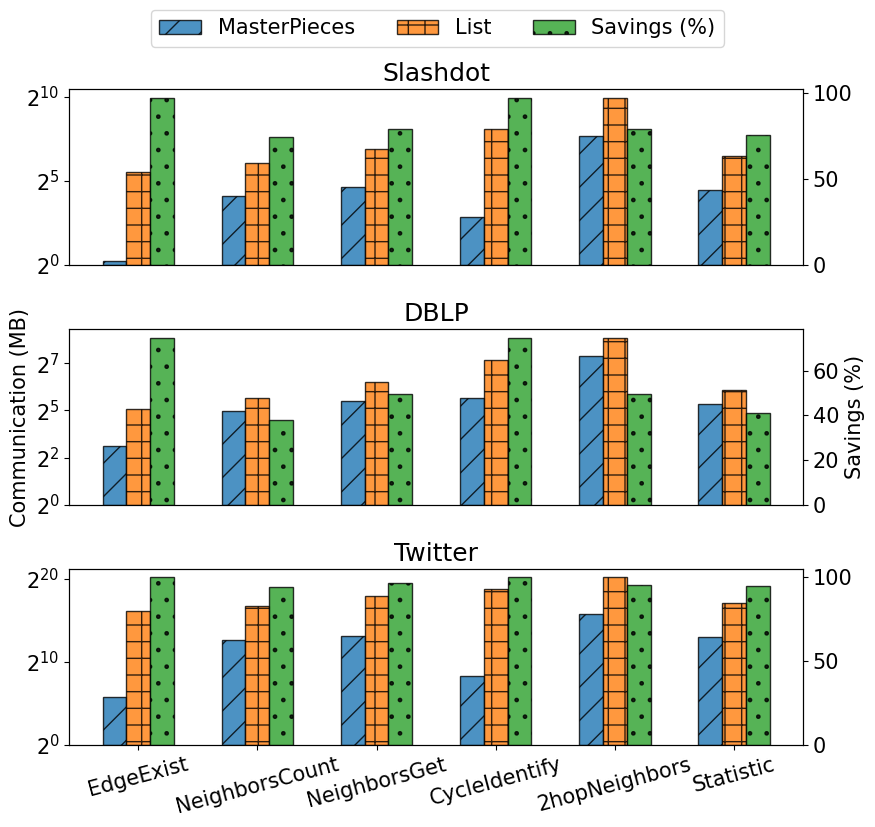

In [9]:
plt.rcParams['font.size'] = 15
fig, axs = plt.subplots(3, 1, figsize=(9, 8))

target_dicts = ["slashdot", "dblp", "twitter"]
hatch_list = ["/", "+", "."]
color_list = plt.cm.tab10([0, 1, 2])

# for target in target_dicts:
for i in range(len(target_dicts)):
    target = target_dicts[i]
    ax = axs[i]
    ax2 = ax.twinx()
    t_dict = eval("comm_" + target)

    operations = list(t_dict.keys())
    privGraph_times = np.array([t_dict[op]["privGraph"] for op in t_dict])
    edgelist_times = np.array([t_dict[op]["edgelist"] for op in t_dict])

    x = np.arange(len(operations))
    width = 0.2

    if(i == 0):
        ax.bar(x - width, np.log2(privGraph_times), width, label='MasterPieces', edgecolor='black', hatch=hatch_list[0], color=color_list[0], alpha=0.8)
        ax.bar(x, np.log2(edgelist_times), width, label='List', edgecolor='black', hatch=hatch_list[1], color=color_list[1], alpha=0.8)
        ax2.bar(x + width, ((edgelist_times - privGraph_times) / edgelist_times)*100, width, label='Savings (%)', edgecolor='black', hatch=hatch_list[2], color=color_list[2], alpha=0.8)
    else:
        ax.bar(x - width, np.log2(privGraph_times), width, edgecolor='black', hatch=hatch_list[0], color=color_list[0], alpha=0.8)
        ax.bar(x, np.log2(edgelist_times), width, edgecolor='black', hatch=hatch_list[1], color=color_list[1], alpha=0.8)
        ax2.bar(x + width, ((edgelist_times - privGraph_times) / edgelist_times)*100, width, edgecolor='black', hatch=hatch_list[2], color=color_list[2], alpha=0.8)
    
    if(i == 1):
        ax.set_ylabel('Communication (MB)', fontsize=15)
        ax2.set_ylabel('Savings (%)', fontsize=15)
    
    log2formatter = FuncFormatter(log_2_formatter)
    # ax.set_title(title_dict[target])
    title = target
    if(target == "slashdot"):
        title = "Slashdot"
    elif(target == "dblp"):
        title = "DBLP"
    elif(target == "twitter"):
        title = "Twitter"
    ax.set_title(title)
    ax.yaxis.set_major_formatter(log2formatter)
    # ax2.yaxis.set_major_formatter(log2formatter)
    
    # ax.set_xticks(rotation=45)
    if(i == 2):
        ax.set_xticks(x)
        ax.set_xticklabels(operations, rotation=15)
    else:
        ax.set_xticks([])

    
# plt.legend()
fig.legend(bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=3)
plt.tight_layout()
# plt.show()
plt.savefig("./graph/real_world_communications.pdf", bbox_inches='tight', dpi=300)


In [12]:
saving_dict_twitter = {op: ((comm_twitter[op]["edgelist"] - comm_twitter[op]["privGraph"]) / comm_twitter[op]["edgelist"])*100 for op in comm_twitter}
saving_dict_dblp = {op: ((comm_dblp[op]["edgelist"] - comm_dblp[op]["privGraph"]) / comm_dblp[op]["edgelist"])*100 for op in comm_dblp}
saving_dict_slashdot = {op: ((comm_slashdot[op]["edgelist"] - comm_slashdot[op]["privGraph"]) / comm_slashdot[op]["edgelist"])*100 for op in comm_slashdot}

In [16]:
basic_queries = ["NeighborsCount", "NeighborsGet", "2hopNeighbors", "Statistic"]
basic_query_savings_twitter = np.array([saving_dict_twitter[op] for op in basic_queries])
basic_query_savings_dblp = np.array([saving_dict_dblp[op] for op in basic_queries])
basic_query_savings_slashdot = np.array([saving_dict_slashdot[op] for op in basic_queries])

print(basic_query_savings_twitter.mean())
print(basic_query_savings_dblp.mean())
print(basic_query_savings_slashdot.mean())

all_mat = np.array([basic_query_savings_twitter, basic_query_savings_dblp, basic_query_savings_slashdot])
all_mat.mean()

95.14663707603185
44.600034275542924
77.29039104805692


72.34568746654391

In [13]:
saving_mat_twitter = np.array([saving_dict_twitter[op] for op in saving_dict_twitter])
print(saving_mat_twitter.mean())
print(saving_mat_twitter.max())

96.73970092248668
99.92582862072


In [58]:
saving_mat_twitter

array([99.92582862, 94.23955994, 96.51697748, 99.92582861, 95.31606621,
       94.51394468])

In [54]:
saving_mat_dblp = np.array([saving_dict_dblp[op] for op in saving_dict_dblp])
print(saving_mat_dblp.mean())
print(saving_mat_dblp.max())

54.674289063678394
74.8228207639569


In [55]:
saving_mat_slashdot = np.array([saving_dict_slashdot[op] for op in saving_dict_slashdot])
print(saving_mat_slashdot.mean())
print(saving_mat_slashdot.max())

83.99452892814814
97.40280746726596


In [57]:
saving_mats = np.array([saving_mat_slashdot, saving_mat_dblp, saving_mat_twitter])
print(saving_mats.mean())
print(saving_mats.max())

78.46950630477107
99.92582862072
